In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import itertools

import summarize
from summarize import df_summary
from summarize import nulls_by_col
from summarize import nulls_by_row
from summarize import df_value_counts

# data visualization
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

# ignore warnings
import warnings

In [126]:
def acquire_activity():
    
    csvs = ['fitbit_2018-04-26_through_2018-05-26.csv', 'fitbit_2018-05-27_through_2018-06-26.csv', 
           'fitbit_2018-06-27_through_2018-07-27.csv', 'fitbit_2018-07-28_through_2018-08-26.csv',
           'fitbit_2018-08-27_through_2018-09-26.csv', 'fitbit_2018-09-27_through_2018-10-27.csv',
           'fitbit_2018-10-28_through-2018-11-27.csv', 'fitbit_2018-11-28_through_2018-12-28.csv']
    
    frames = []
    
    for csv in csvs:
        data_file = csv
        
        data_file_delimiter = ','

        largest_column_count = 0

        with open(data_file, 'r') as temp_f:
            lines = temp_f.readlines()

            for l in lines:
                column_count = len(l.split(data_file_delimiter)) + 1

                largest_column_count = column_count if largest_column_count < column_count else largest_column_count

        temp_f.close()
        
        column_names = [i for i in range(0, largest_column_count)]
        
        df = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
        
        df = df[df.isnull().sum(axis=1) == 5]
        
        df.drop(columns=[10, 11, 12, 13, 14], inplace=True)
        
        df.replace(regex=True, inplace=True, to_replace=r' ', value=r'_')
        
        df.replace(regex=True, inplace=True, to_replace=r',', value=r'')
        
        df.rename(columns=df.iloc[0], inplace=True)
        
        df.drop(df.index[0], inplace=True)
        
        df['Date'] = pd.to_datetime(df['Date'])
        
        df.set_index('Date', inplace=True)
        
        cols = list(df)
        for col in cols:
            df = df.convert_objects(convert_numeric=True)
        act = df_activity(df)
        
        
        
        return pd.concat(df)

In [127]:
act_df = acquire_activity()

1


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


KeyError: '[10 11 12 13 14] not found in axis'

In [60]:
data_file_delimiter = ','

largest_column_count = 0

with open(data_file, 'r') as temp_f:
    lines = temp_f.readlines()

    for l in lines:
        column_count = len(l.split(data_file_delimiter)) + 1

        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

temp_f.close()

column_names = [i for i in range(0, largest_column_count)]

In [2]:
def df_activity(df):
    df = df[df.isnull().sum(axis=1) == 5]
    print(1)
    df.drop(columns=[10, 11, 12, 13, 14], inplace=True)
    print(2)
    df.replace(regex=True, inplace=True, to_replace=r' ', value=r'_')
    print(3)
    df.replace(regex=True, inplace=True, to_replace=r',', value=r'')
    print(4)
    df.rename(columns=df.iloc[0], inplace=True)
    print(5)
    df.drop(df.index[0], inplace=True)
    print(6)
    df['Date'] = pd.to_datetime(df['Date'])
    print(7)
    df['month'] = df['Date'].dt.month
    print(8)
    df['day'] = df['Date'].dt.day
    print(9)
    df.set_index('Date', inplace=True)
    print(10)
    cols = list(df)
    for col in cols:
        df = df.convert_objects(convert_numeric=True)
    return df

In [5]:
data_file = 'fitbit_2018-04-26_through_2018-05-26.csv'
df1 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_1 = df_activity(df1)
act_1.head(3)

1
2
3
4
5
6


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/local/anaconda3/lib/python3.7/site-package

7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,4,26
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,4,27
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,4,28


In [6]:
data_file = 'fitbit_2018-05-27_through_2018-06-26.csv'
df2 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_2 = df_activity(df2)
act_2.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-05-27,3407,5347,2.52,2,825,209,21,6,1260,5,27
2018-05-28,3213,3875,1.83,2,668,164,0,0,922,5,28
2018-05-29,3466,6448,3.04,0,899,254,9,0,1427,5,29


In [7]:
data_file = 'fitbit_2018-06-27_through_2018-07-27.csv'
df3 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_3 = df_activity(df3)
act_3.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,6,27
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,6,28
2018-06-29,2180,0,0.0,0,1437,3,0,0,39,6,29


In [8]:
data_file = 'fitbit_2018-07-28_through_2018-08-26.csv'
df4 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_4 = df_activity(df4)
act_4.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-07-28,3358,8073,3.81,5,674,236,19,9,1481,7,28
2018-07-29,3316,6450,3.04,18,1211,192,17,20,1382,7,29
2018-07-30,2212,357,0.17,1,947,17,0,0,85,7,30


In [9]:
data_file = 'fitbit_2018-08-27_through_2018-09-26.csv'
df5 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_5 = df_activity(df5)
act_5.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-08-27,4458,15714,7.48,15,608,259,9,96,2692,8,27
2018-08-28,3757,12569,5.93,14,717,218,8,58,1874,8,28
2018-08-29,3222,8559,4.04,16,853,166,4,35,1266,8,29


In [10]:
data_file = 'fitbit_2018-09-27_through_2018-10-27.csv'
df6 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_6 = df_activity(df6)
act_6.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-09-27,3348,9751,4.60,7,849,167,10,42,1427,9,27
2018-09-28,2970,4531,2.14,4,775,235,0,0,1068,9,28
2018-09-29,3043,7043,3.32,5,788,218,4,5,1220,9,29


In [11]:
data_file = 'fitbit_2018-10-28_through-2018-11-27.csv'
df7 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_7 = df_activity(df7)
act_7.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-10-28,4450,19956,9.41,9,632,239,52,112,2834,10,28
2018-10-29,3566,12544,5.92,8,665,192,8,66,1774,10,29
2018-10-30,3572,14794,6.98,14,771,170,8,93,1817,10,30


In [12]:
data_file = 'fitbit_2018-11-28_through_2018-12-28.csv'
df8 = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
act_8 = df_activity(df8)
act_8.head(3)

1
2
3
4
5
6
7
8
9
10


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories,month,day
Date,,,,,,,,,,,
2018-11-28,3088,7602,3.59,16,717,272,0,0,1361,11,28
2018-11-29,3693,12380,6.56,18,717,258,15,53,2051,11,29
2018-11-30,3269,9559,4.51,14,699,288,12,6,1577,11,30


In [13]:
frames = [act_1, act_2, act_3, act_4, act_5, act_6, act_7, act_8]
df_act = pd.concat(frames)
df_act.shape

(225, 11)

In [14]:
df_summary(df_act)

--- Shape: (225, 11)
--- Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 11 columns):
Calories_Burned           225 non-null int64
Steps                     225 non-null int64
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes_Sedentary         225 non-null int64
Minutes_Lightly_Active    225 non-null int64
Minutes_Fairly_Active     225 non-null int64
Minutes_Very_Active       225 non-null int64
Activity_Calories         225 non-null int64
month                     225 non-null int64
day                       225 non-null int64
dtypes: float64(1), int64(10)
memory usage: 21.1 KB
--- Descriptions
       Calories_Burned         Steps    Distance      Floors  \
count       225.000000    225.000000  225.000000  225.000000   
mean       3401.911111   8536.186667    4.046800   12.591111   
std         632.426578   5255.746608    2.506253   25.844174   
min         799.000000  

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


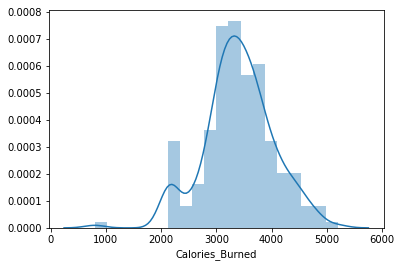

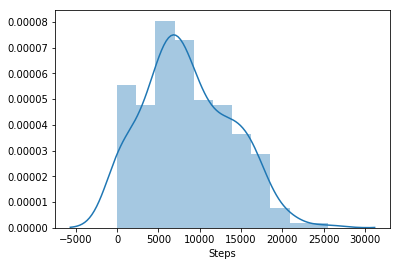

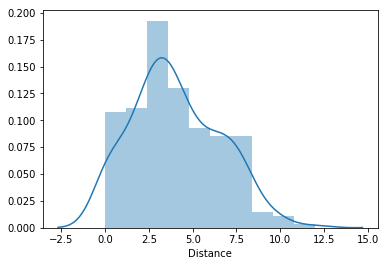

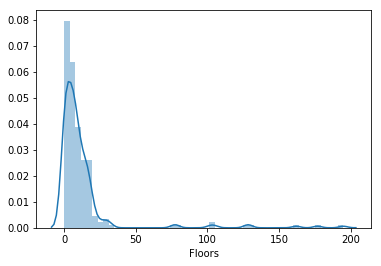

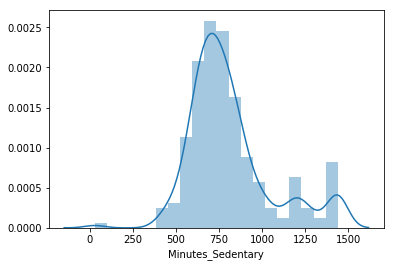

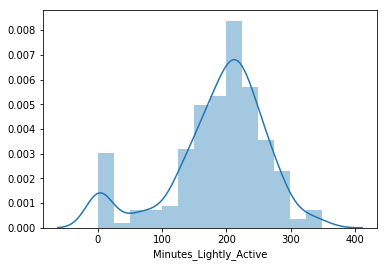

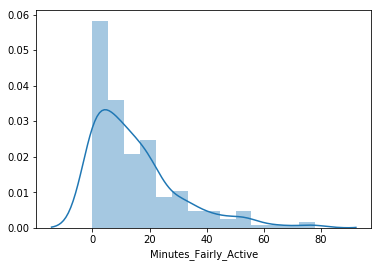

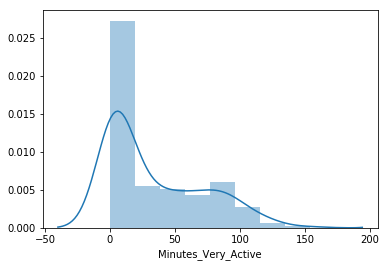

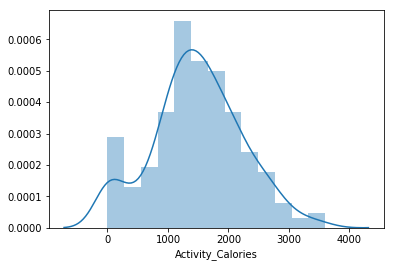

In [134]:
df1 = df_act.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.distplot(df1[col])

In [136]:
list(df_act)

['Calories_Burned',
 'Steps',
 'Distance',
 'Floors',
 'Minutes_Sedentary',
 'Minutes_Lightly_Active',
 'Minutes_Fairly_Active',
 'Minutes_Very_Active',
 'Activity_Calories']

In [145]:
df_act['month'] = df_act['Date'].dt.month
df_act['day'] = df_act['Date'].dt.day

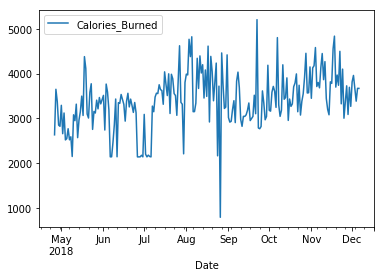

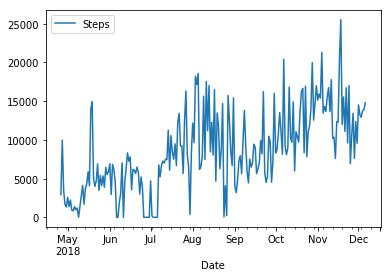

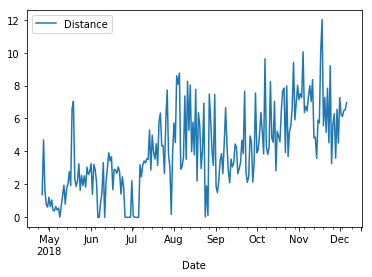

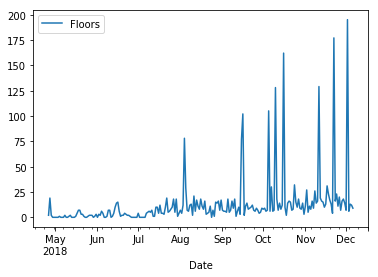

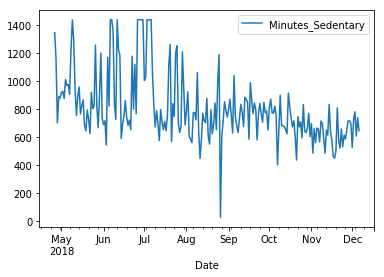

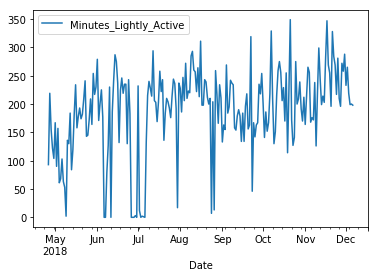

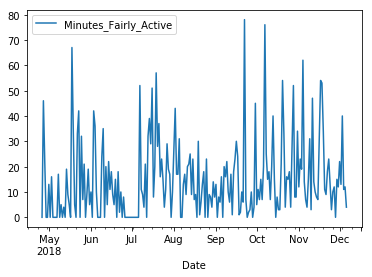

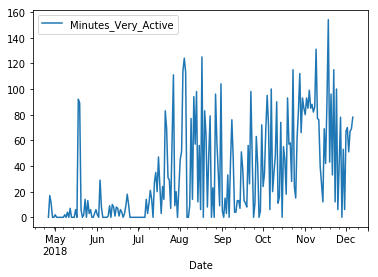

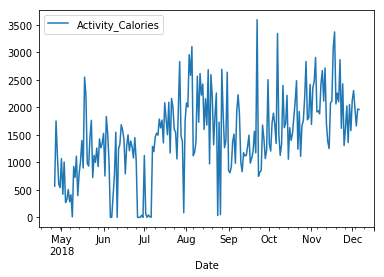

In [146]:
plot_act_day(df_act)

In [15]:
def plot_act_month(df):
    cols = list(df)
    for col in cols:
        by_month = df.groupby(['month'])
        by_month.plot(y=col)

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


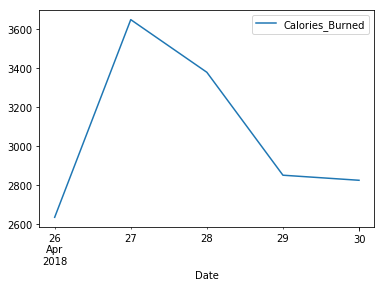

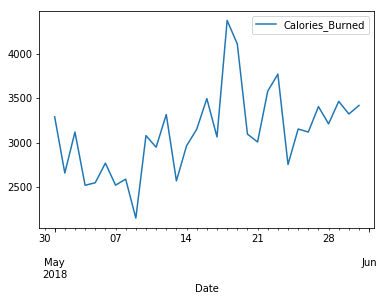

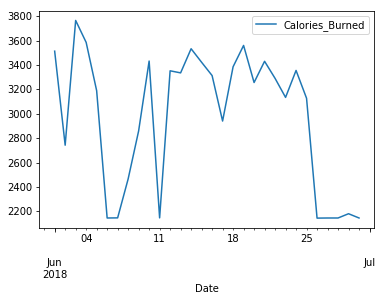

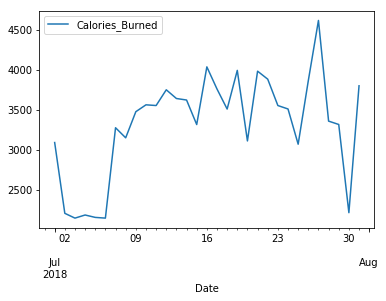

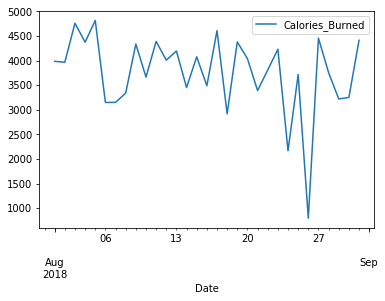

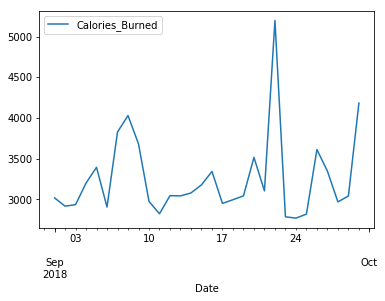

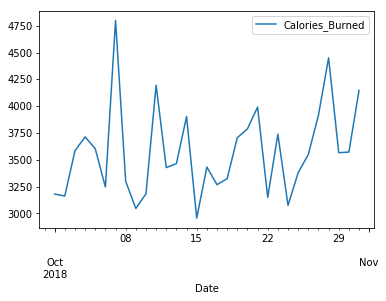

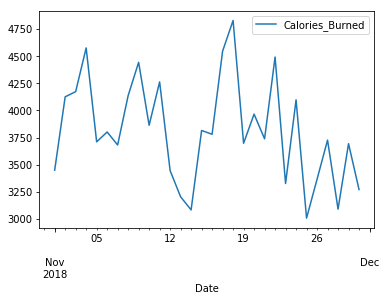

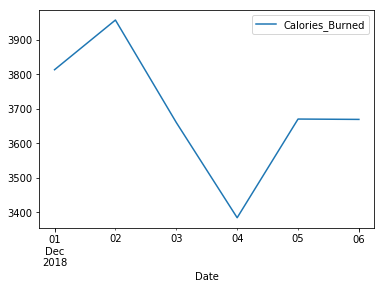

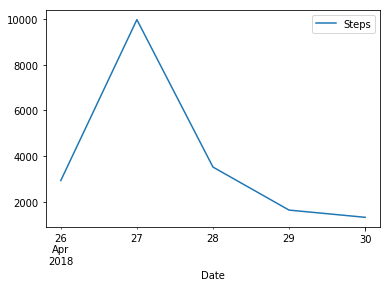

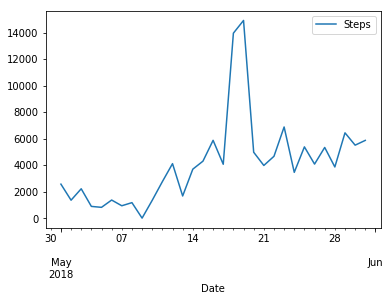

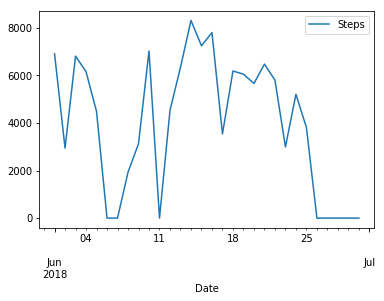

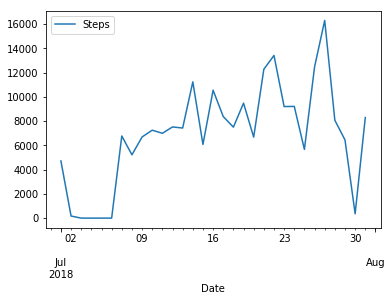

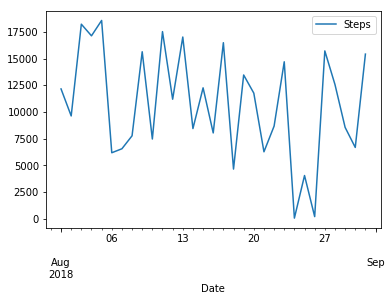

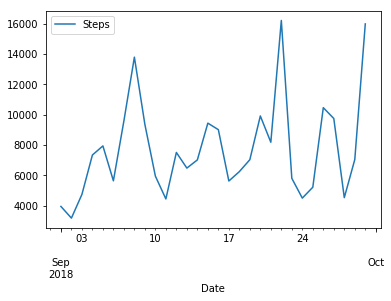

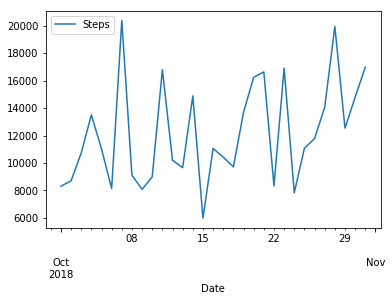

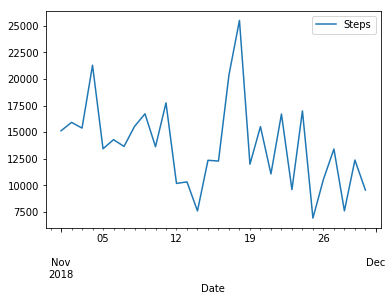

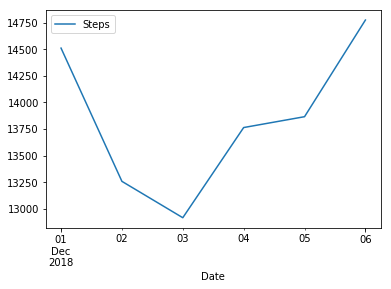

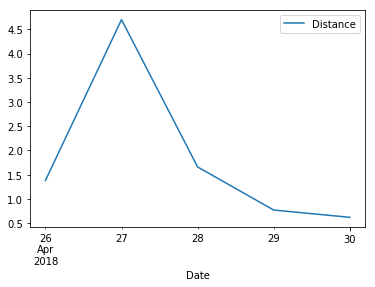

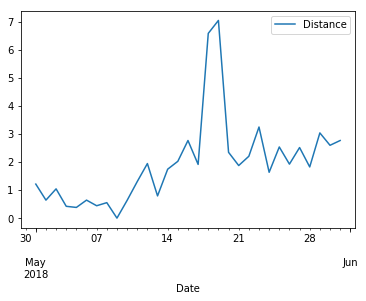

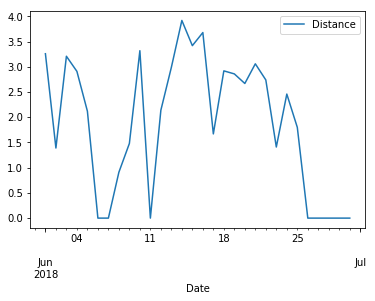

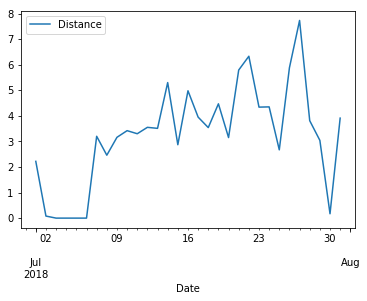

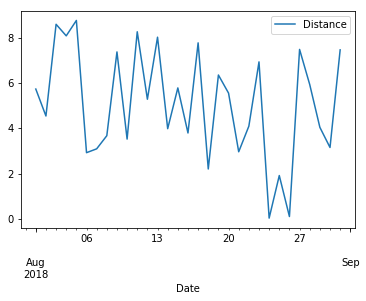

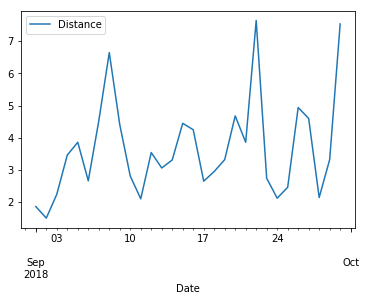

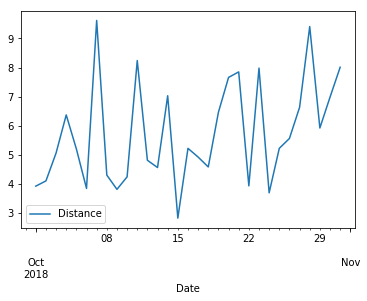

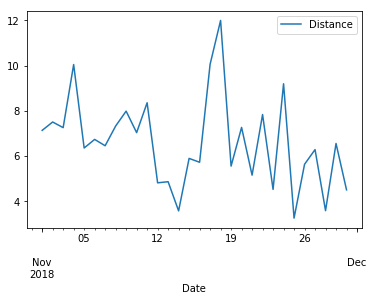

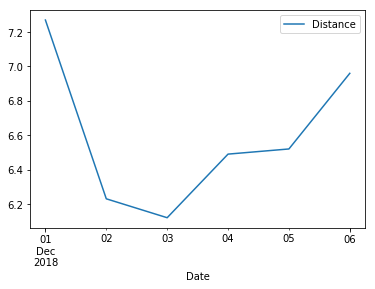

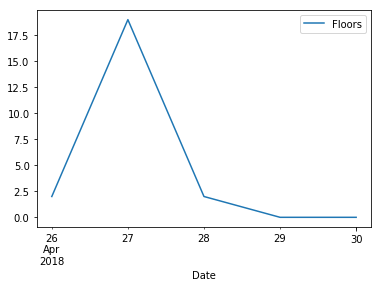

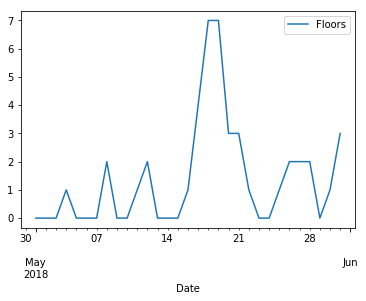

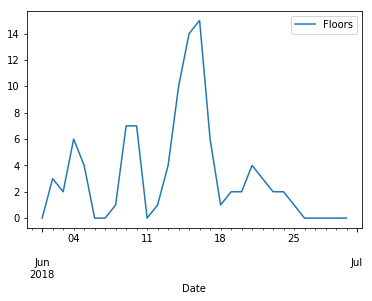

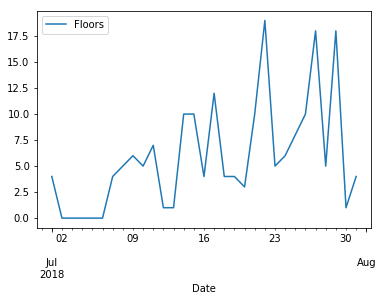

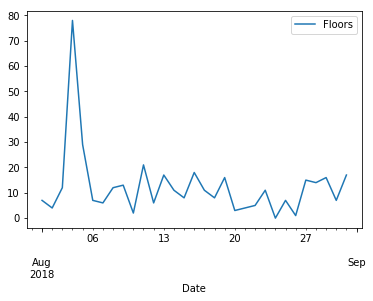

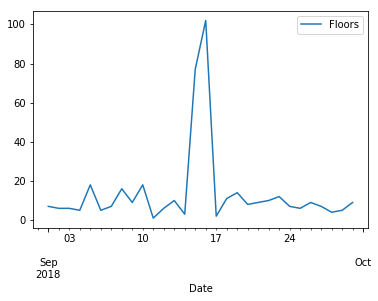

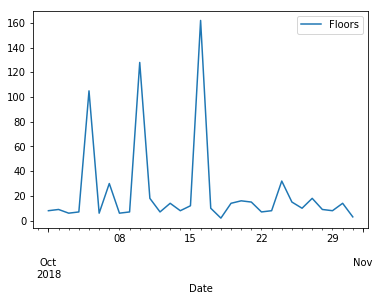

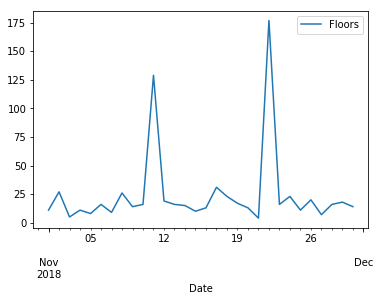

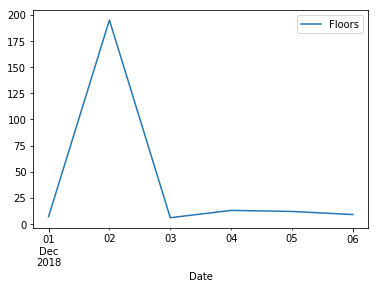

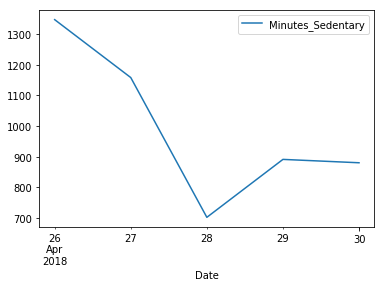

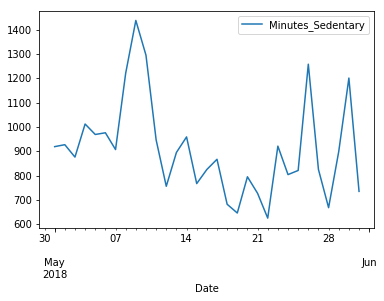

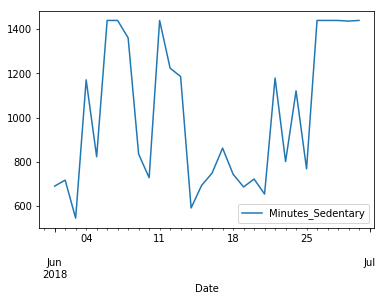

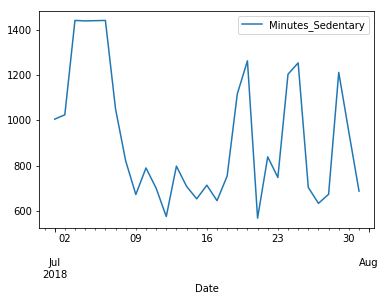

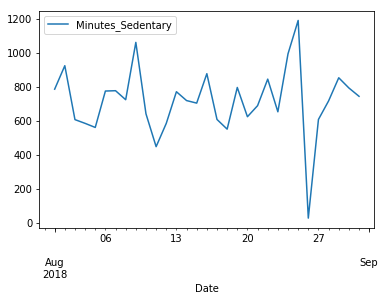

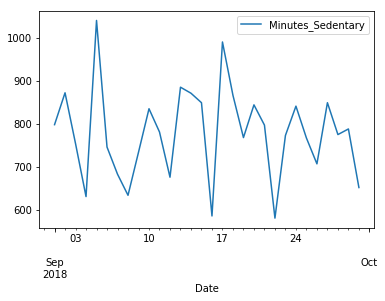

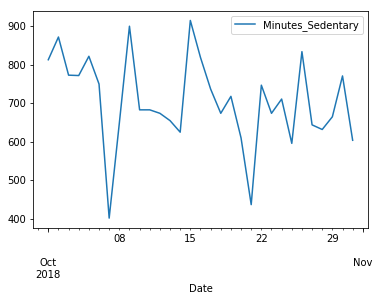

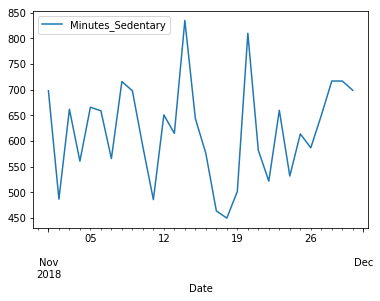

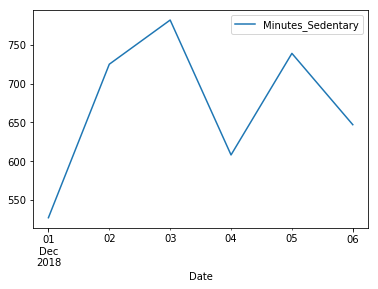

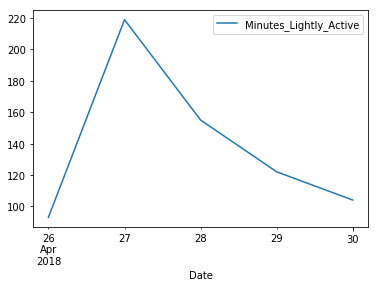

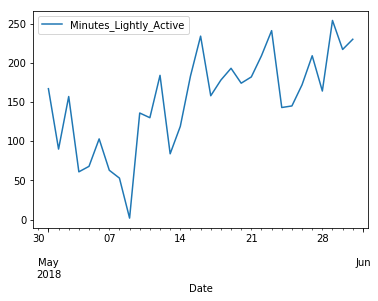

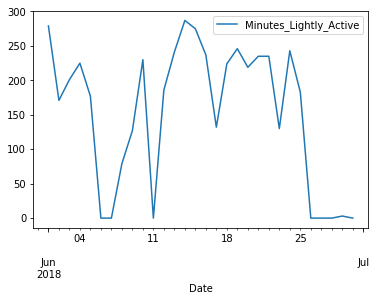

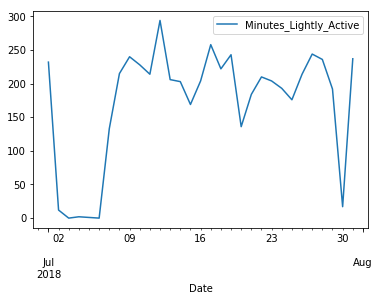

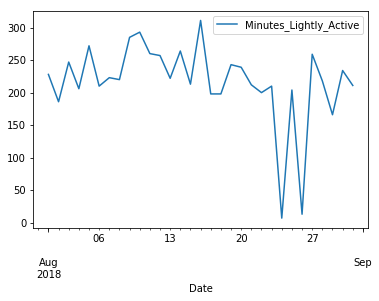

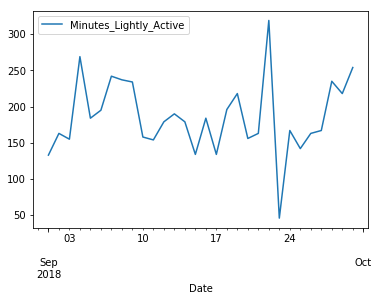

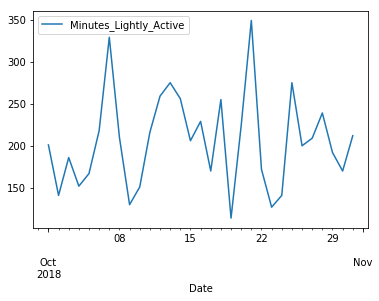

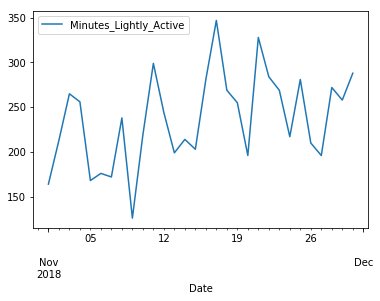

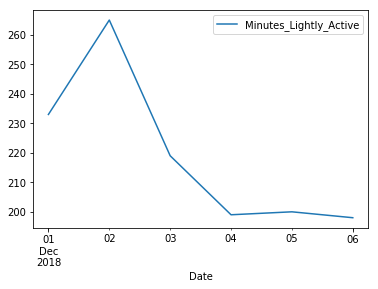

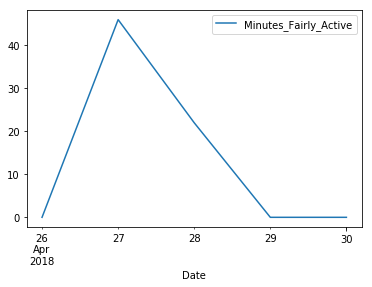

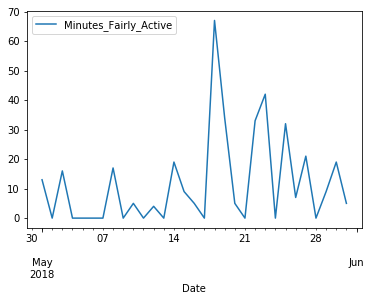

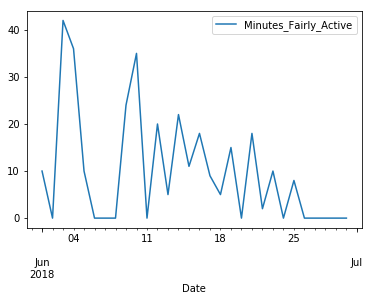

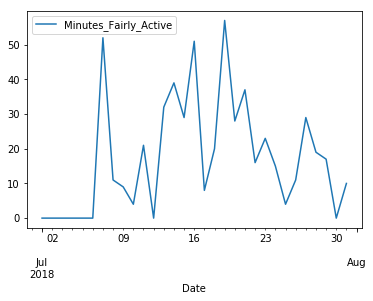

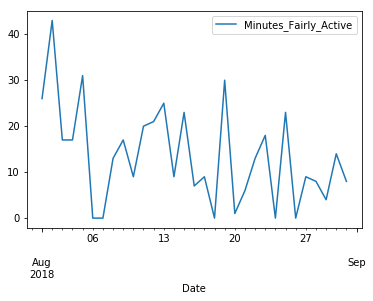

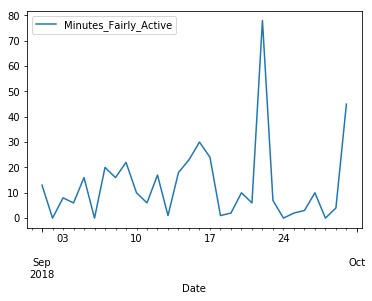

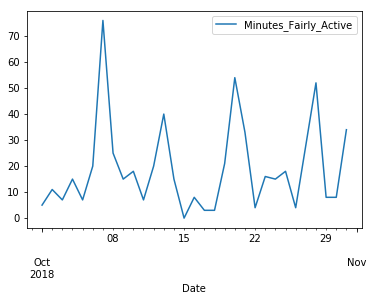

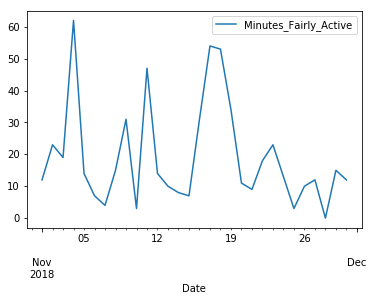

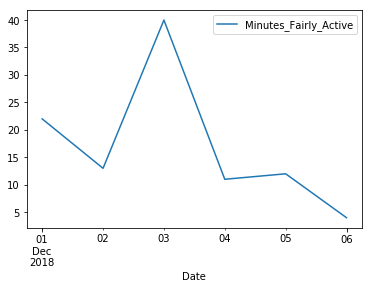

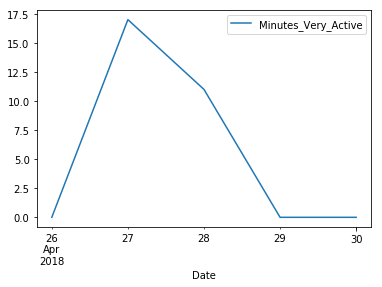

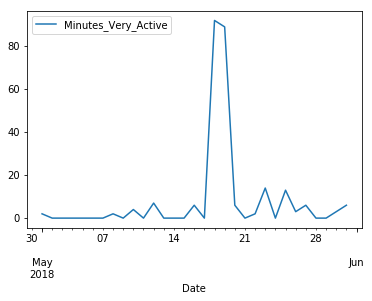

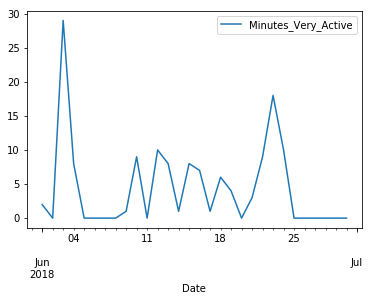

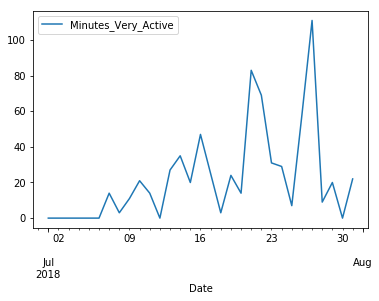

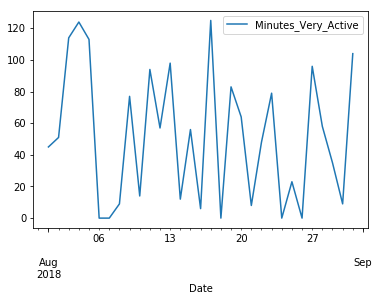

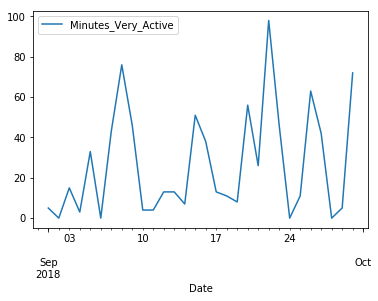

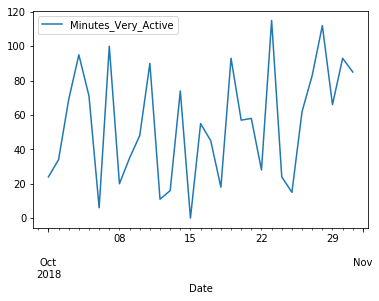

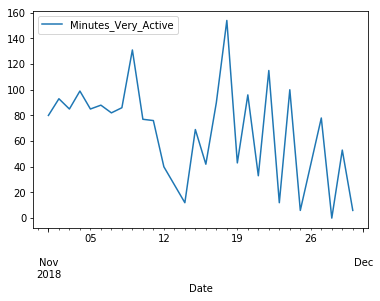

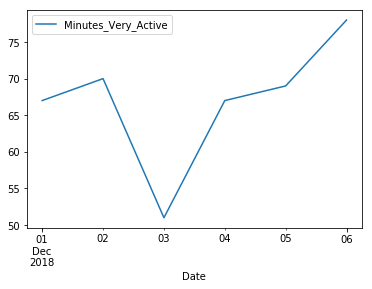

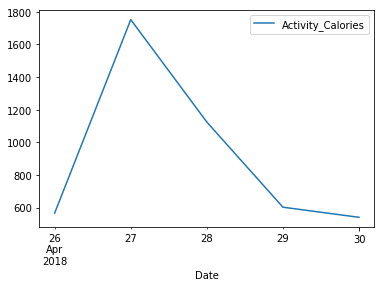

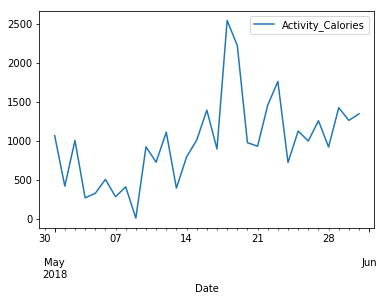

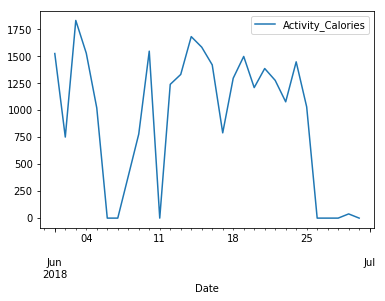

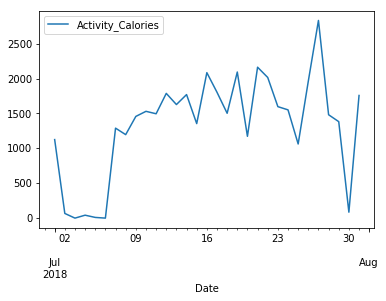

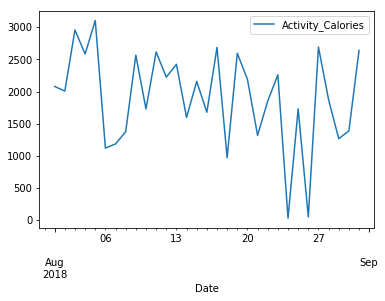

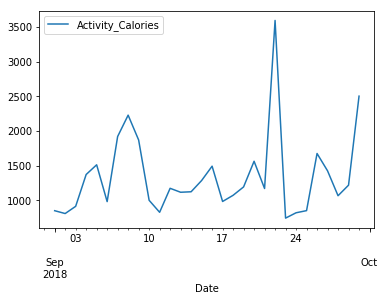

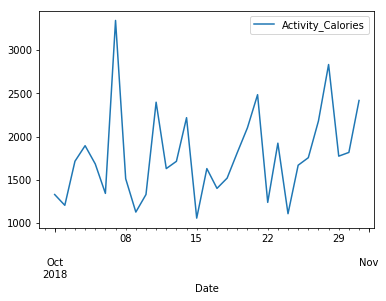

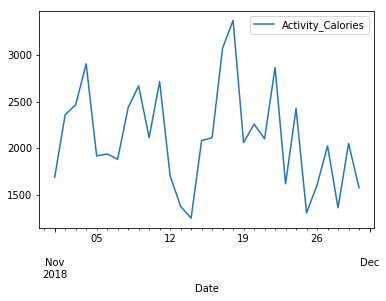

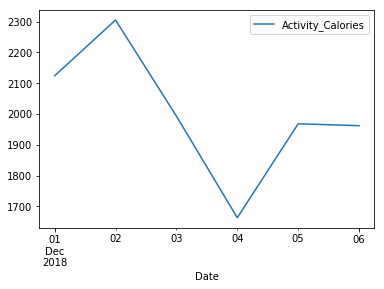

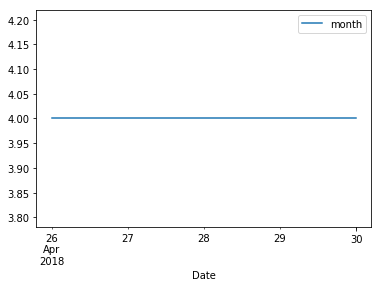

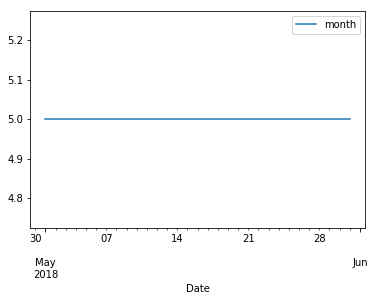

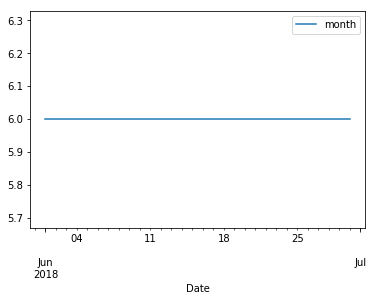

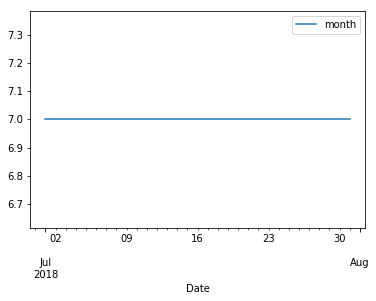

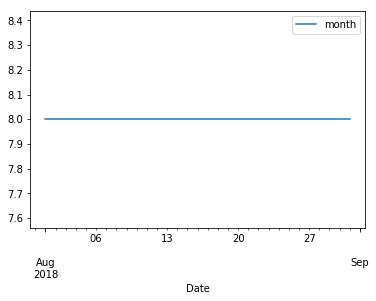

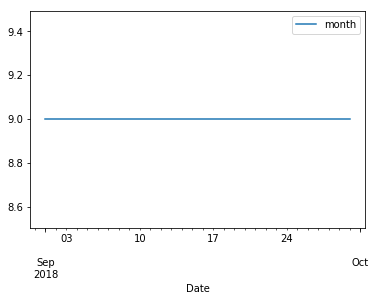

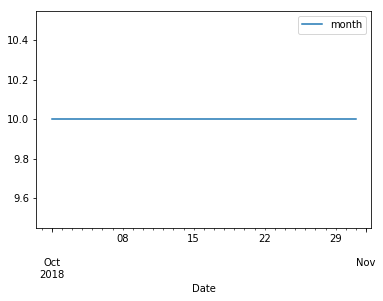

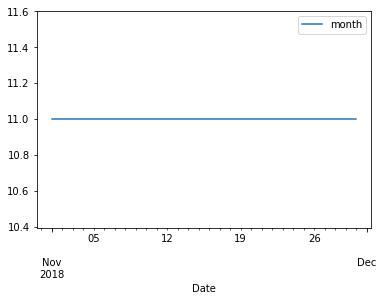

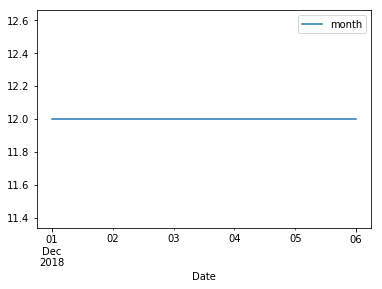

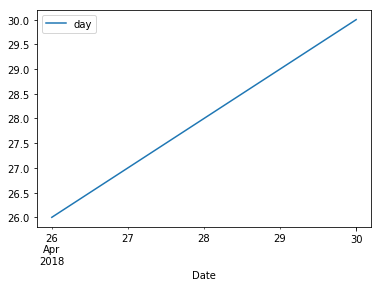

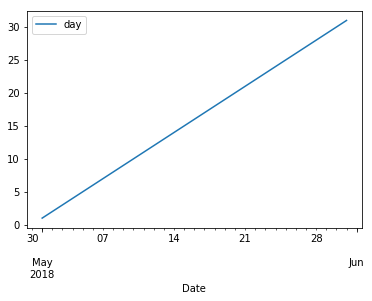

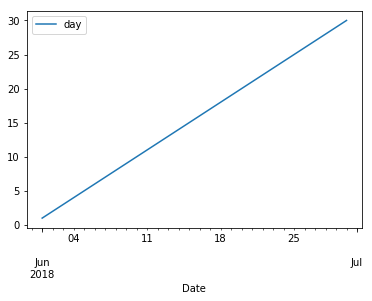

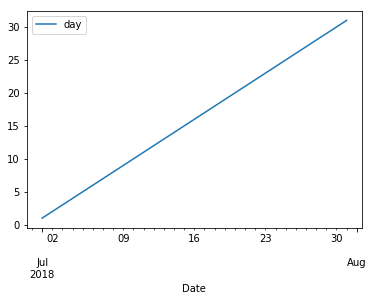

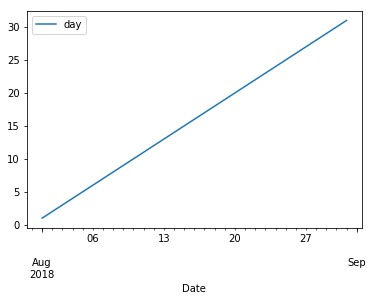

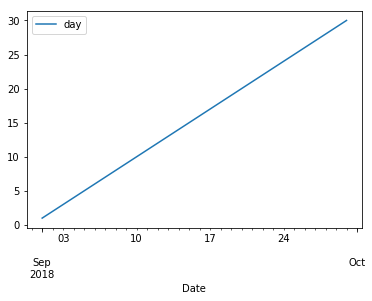

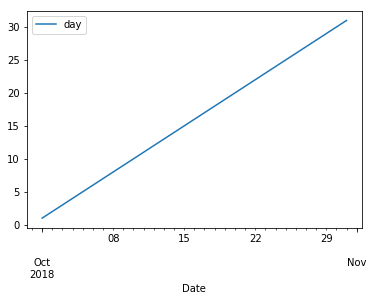

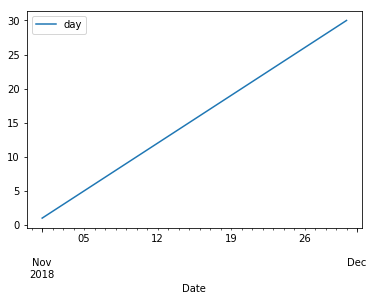

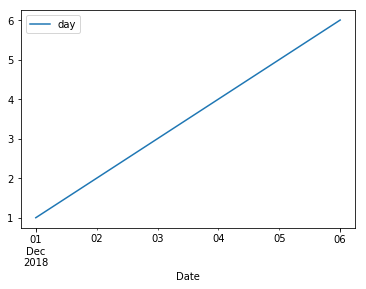

In [16]:
plot_act_month(df_act)

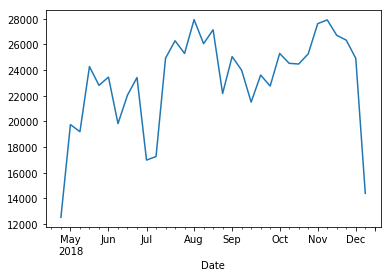

In [44]:
weekly = df_act.resample('W').Calories_Burned.sum()
weekly.plot()

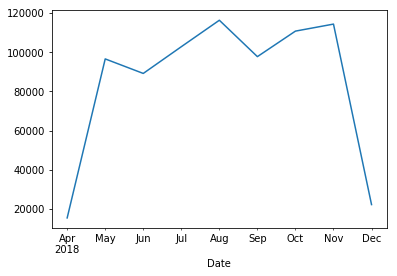

In [35]:
monthly = df_act.resample('M').Calories_Burned.sum()
monthly.resample('M').sum().plot()

In [49]:
def plot_act_week(df):
    cols = list(df)
    for col in cols:
        monthly = df.resample('W')[col].sum()
        monthly.plot(y=col)
        plt.legend()

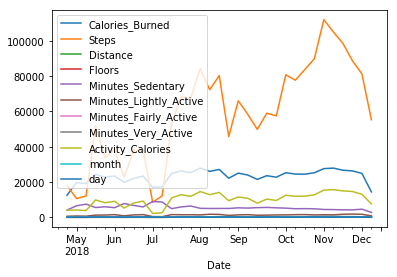

In [50]:
plot_act_week(df_act)

In [57]:
def plot_act_week_sub(df):
    cols = list(df)
    for col in cols:
        monthly = df.resample('W')[col].sum()
        plt.subplot
        monthly.plot(y=col)
        plt.legend()

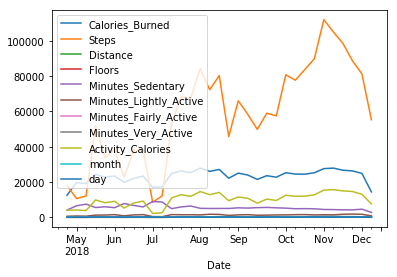

In [58]:
plot_act_week_sub(df_act)

In [41]:
def plot_act_month(df):
    cols = list(df)
    for col in cols:
        monthly = df.resample('M')[col].sum()
        monthly.plot(y=col)

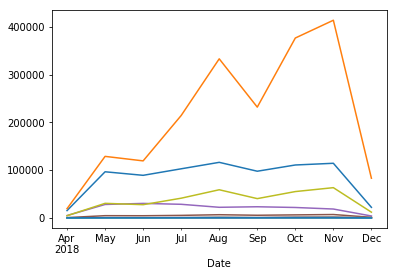

In [42]:
plot_act_month(df_act)

In [43]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(monthly)

ValueError: operands could not be broadcast together with shapes (9,) (17,) 

In [15]:
df.sample(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
71,NaN,Carbs,0 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Food Log 20180506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,Daily Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2018-05-11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,2018-05-26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,Calories,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,Calories,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2018-05-24,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,NaN,Carbs,0 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,NaN,Sodium,0 mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()

0     217
1      64
2      96
3     313
4     313
5     313
6     313
7     313
8     313
9     313
10    345
11    345
12    345
13    345
14    345
dtype: int64

In [17]:
def nulls_by_row(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [18]:
nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,5,33.33333333333333,32
1,13,86.66666666666667,249
2,14,93.33333333333333,64


In [19]:
missing_14 = df[df.isnull().sum(axis=1) == 14]

In [20]:
missing_14

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Foods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Activities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Food Log 20180426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Daily Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Food Log 20180427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Daily Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Food Log 20180428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Daily Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Food Log 20180429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Daily Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
missing_5 = df[df.isnull().sum(axis=1) == 5]
missing_5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
34,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,NaN,NaN,NaN,NaN,NaN
35,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566,NaN,NaN,NaN,NaN,NaN
36,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752",NaN,NaN,NaN,NaN,NaN
37,2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124",NaN,NaN,NaN,NaN,NaN
38,2018-04-29,"2,851","1,639",0.77,0,891,122,0,0,602,NaN,NaN,NaN,NaN,NaN
39,2018-04-30,"2,825","1,323",0.62,0,880,104,0,0,540,NaN,NaN,NaN,NaN,NaN
40,2018-05-01,"3,292","2,581",1.22,0,919,167,13,2,"1,068",NaN,NaN,NaN,NaN,NaN
41,2018-05-02,"2,660","1,372",0.65,0,927,90,0,0,419,NaN,NaN,NaN,NaN,NaN
42,2018-05-03,"3,121","2,232",1.05,0,876,157,16,0,"1,006",NaN,NaN,NaN,NaN,NaN
43,2018-05-04,"2,522",904,0.43,1,"1,012",61,0,0,269,NaN,NaN,NaN,NaN,NaN


In [26]:
missing_5.shape

(32, 15)

In [24]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing/rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

Looking at the info below, we can see that columns 0-9 are not missing any values, but 10-14 are missing all 32 values.  We'll drop those columns, then rename the columns and drop the index so that the date is the index.

In [25]:
nulls_by_col(missing_5)

,num_rows_missing,pct_rows_missing
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [59]:
missing_5.drop(columns=[10, 11, 12, 13, 14], inplace=True)
missing_5.head(2)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,0,1,2,3,4,5,6,7,8,9
34,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
35,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566


In [60]:
missing_5.replace(regex=True, inplace=True, to_replace=r' ', value=r'_')
missing_5.head(3)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,0,1,2,3,4,5,6,7,8,9
34,Date,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
35,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
36,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"


In [69]:
missing_5.replace(regex=True, inplace=True, to_replace=r',', value=r'')
missing_5.head(3)

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
Date,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566
2018-04-27,3649,9971,4.7,19,1158,219,46,17,1752
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124


In [61]:
missing_5.rename(columns=missing_5.iloc[0], inplace=True)
missing_5.head()

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Date,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
34,Date,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
35,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
36,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"
37,2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
38,2018-04-29,"2,851","1,639",0.77,0,891,122,0,0,602


In [62]:
missing_5.drop(missing_5.index[0], inplace=True)
missing_5.head(3)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
35,2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
36,2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"
37,2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124"


In [49]:
missing_5.dtypes

Date                      object
Calories Burned           object
Steps                     object
Distance                  object
Floors                    object
Minutes Sedentary         object
Minutes Lightly Active    object
Minutes Fairly Active     object
Minutes Very Active       object
Activity Calories         object
dtype: object

In [63]:
missing_5['Date'] = pd.to_datetime(missing_5['Date'])
missing_5.dtypes

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Date                      datetime64[ns]
Calories_Burned                   object
Steps                             object
Distance                          object
Floors                            object
Minutes_Sedentary                 object
Minutes_Lightly_Active            object
Minutes_Fairly_Active             object
Minutes_Very_Active               object
Activity_Calories                 object
dtype: object

In [64]:
missing_5.set_index('Date', inplace=True)
missing_5.head(3)

,Calories_Burned,Steps,Distance,Floors,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Activity_Calories
Date,,,,,,,,,
2018-04-26,"2,635","2,931",1.38,2,"1,347",93,0,0,566
2018-04-27,"3,649","9,971",4.7,19,"1,158",219,46,17,"1,752"
2018-04-28,"3,379","3,521",1.66,2,702,155,22,11,"1,124"


In [83]:
def convert_to_numeric(df):
    cols = list(df)
    for col in cols:
        df = df.convert_objects(convert_numeric=True)
    return df

In [85]:
missing_5 = convert_to_numeric(missing_5)
missing_5.dtypes

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


Calories_Burned             int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes_Sedentary           int64
Minutes_Lightly_Active      int64
Minutes_Fairly_Active       int64
Minutes_Very_Active         int64
Activity_Calories           int64
dtype: object

In [87]:
df_summary(missing_5)

--- Shape: (31, 9)
--- Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-04-26 to 2018-05-26
Data columns (total 9 columns):
Calories_Burned           31 non-null int64
Steps                     31 non-null int64
Distance                  31 non-null float64
Floors                    31 non-null int64
Minutes_Sedentary         31 non-null int64
Minutes_Lightly_Active    31 non-null int64
Minutes_Fairly_Active     31 non-null int64
Minutes_Very_Active       31 non-null int64
Activity_Calories         31 non-null int64
dtypes: float64(1), int64(8)
memory usage: 2.4 KB
--- Descriptions
       Calories_Burned         Steps   Distance     Floors  Minutes_Sedentary  \
count        31.000000     31.000000  31.000000  31.000000          31.000000   
mean       3067.935484   3908.193548   1.842903   1.870968         929.451613   
std         488.448696   3506.839702   1.653983   3.694518         206.236893   
min        2153.000000     21.000000   0.010000   0.000000   

In [23]:
missing_13 = df[df.isnull().sum(axis=1) == 13]
missing_13

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,Date,Calories In,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-04-29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-04-30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-01,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-05-02,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-05-03,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2018-05-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
